# Objective
* The main objective of the project is to identify the optimal location for a business in Haiti, specifically in the West Department. This can be a new business or an extension of an existing business in the form of a branch office.

# Data Source

* The data used for this project comes from several sources, first of all to have all the companies in the western department I had to do some web scraping and then for the demographic information I had access to the results of a survey conducted by the <b>Office For The Coordination Of Humanitarian Affairs</b> on the density of the Haitian population by department and by municipality.

* Other information such as average per capita income, total activity rate, and tax revenues by department were obtained via articles on the Haitian economy.

### Importing Libraries

In [736]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

### Loading Dataset

In [737]:
#Loading Business Data Files
kenscoff       = pd.read_excel('business_paup.xlsx', sheet_name='kenscoff')
paup           = pd.read_excel('business_paup.xlsx', sheet_name='paup')
carrefour      = pd.read_excel('business_paup.xlsx', sheet_name='carrefour')
delmas         = pd.read_excel('business_paup.xlsx', sheet_name='delmas')
crxdesbouquets = pd.read_excel('business_paup.xlsx', sheet_name='crxdesbouquets')
tabarre        = pd.read_excel('business_paup.xlsx', sheet_name='tabarre')
leogane        = pd.read_excel('business_paup.xlsx', sheet_name='leogane')
petitgoave     = pd.read_excel('business_paup.xlsx', sheet_name='petit_goave')
grandgoave     = pd.read_excel('business_paup.xlsx', sheet_name='grand_goave')
cabaret        = pd.read_excel('business_paup.xlsx', sheet_name='cabaret')
arcahaie       = pd.read_excel('business_paup.xlsx', sheet_name='arcahaie')
ganthier       = pd.read_excel('business_paup.xlsx', sheet_name='ganthier')
gressier       = pd.read_excel('business_paup.xlsx', sheet_name='gressier')

#Population dataset file
population     = pd.read_excel('hti-pop-statistics.xlsx')

#Municipality geo location
commune_geolocalisation = pd.read_excel('hti_commune_geolocation.xlsx')

In [738]:
# Business Dataset file concatenation
dataset = pd.concat([paup,carrefour,delmas,kenscoff,crxdesbouquets,tabarre,
                     leogane,petitgoave,grandgoave,cabaret,arcahaie,ganthier,gressier])
display(dataset.shape)
display(dataset.info())

(3166, 6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3166 entries, 0 to 14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   adm2code          3166 non-null   object
 1   commune           3166 non-null   object
 2   name              3166 non-null   object
 3   secteur activite  3166 non-null   object
 4   category          3166 non-null   object
 5   address           3166 non-null   object
dtypes: object(6)
memory usage: 173.1+ KB


None

In [739]:
dataset=dataset.reset_index()

In [741]:
#Selecting the needed column
dataset = dataset.loc[:,['index','adm2code','commune','secteur activite','category']]
dataset.head()

,index,adm2code,commune,secteur activite,category
0,0,HT0111,Port-au-Prince,sante,ASSOCIATIONS PROFESSIONNELLES
1,1,HT0111,Port-au-Prince,service professionnel,AVOCATS ET CONSEILLERS JURIDIQUES
2,2,HT0111,Port-au-Prince,agroalimentaire,"RHUM,\t\t\t\t\t\t\t\t\t\t\tVINS ET SPIRITUEUX"
3,3,HT0111,Port-au-Prince,sante,OPHTALMOLOGUES
4,4,HT0111,Port-au-Prince,agroalimentaire,PROVISIONS ALIMENTAIRES


In [704]:
dataset['secteur activite'].nunique()

27

In [705]:
dataset['secteur activite'].value_counts()

sante                    704
construction             303
service automobile       246
restauration             214
agroalimentaire          182
service professionnel    149
service financier        145
informatique             134
education                131
fashion                  124
transport                121
commerce                  98
edition                   94
mobilier                  87
medias                    83
energie                   67
artisanat                 51
multi secteur             44
industrie                 36
maintenance               34
service de securite       22
maison funeraire          22
sport                     22
loisirs                   14
distribution              14
musique                   13
service courrier          12
Name: secteur activite, dtype: int64

In [706]:
display(population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   code_iso3       140 non-null    object
 1   adm0_fr         140 non-null    object
 2   adm1code        140 non-null    object
 3   adm1_fr         140 non-null    object
 4   adm2code        140 non-null    object
 5   adm2_fr         140 non-null    object
 6   Population      140 non-null    int64 
 7   Femmes          140 non-null    int64 
 8   Hommes          140 non-null    int64 
 9   Enfants         140 non-null    int64 
 10  Adultes         140 non-null    int64 
 11  Filles          140 non-null    int64 
 12  Garcons         140 non-null    int64 
 13  Femmes adultes  140 non-null    int64 
 14  Hommes adultes  140 non-null    int64 
dtypes: int64(9), object(6)
memory usage: 16.5+ KB


None

In [747]:
final_population = population.iloc[:,4:15]
final_population.head()

,adm2code,adm2_fr,Population,Femmes,Hommes,Enfants,Adultes,Filles,Garcons,Femmes adultes,Hommes adultes
0,HT0111,Port-au-Prince,1031710,544921,486789,417341,614369,220396,196945,324525,289844
1,HT0112,Delmas,413035,217283,195752,174211,238824,91646,82565,125637,113187
2,HT0113,Carrefour,534341,280296,254045,235636,298705,123841,111795,156455,142250
3,HT0114,Pétion-Ville,393779,202894,190885,163369,230410,83521,79848,119373,111037
4,HT0115,Kenscoff,60017,29928,30089,27366,32651,13623,13743,16305,16346


### Additional Information
* According to the academy of economic development the activity rate in haiti is 66.73% and according to the world bank the employment rate is 55% so we can say that on average the employment rate per commune is 55%. 
* According to the World Bank the RNB per capita is  $823.00 with an exchange rate of HTG 95 the average annual income per capita is HTG 78,185.00

In [708]:
final_population['income']= (((final_population['Population']*0.6673)*0.55)*68.5)

In [709]:
final_population.head()

,adm2code,adm2_fr,Population,Femmes,Hommes,Enfants,Adultes,Filles,Garcons,Femmes adultes,income
0,HT0111,Port-au-Prince,1031710,544921,486789,417341,614369,220396,196945,324525,2.593773e+07
1,HT0112,Delmas,413035,217283,195752,174211,238824,91646,82565,125637,1.038392e+07
2,HT0113,Carrefour,534341,280296,254045,235636,298705,123841,111795,156455,1.343361e+07
3,HT0114,Pétion-Ville,393779,202894,190885,163369,230410,83521,79848,119373,9.899812e+06
4,HT0115,Kenscoff,60017,29928,30089,27366,32651,13623,13743,16305,1.508859e+06


In [710]:
secteur=dataset.groupby(by='secteur activite').index.count().to_frame()
secteur=secteur.sort_values(by='index', ascending=False)
display(secteur)

,index
secteur activite,
sante,704
construction,303
service automobile,246
restauration,214
agroalimentaire,182
service professionnel,149
service financier,145
informatique,134
education,131


In [711]:
def table_bar(secteur=''):
    commune=dataset[dataset['secteur activite']==secteur].pivot_table(index='commune', columns='secteur activite', values='index', aggfunc='count')
    commune=commune.sort_values(by=secteur, ascending=False)
    ax = commune.plot(kind='barh')
    for container in ax.containers:
        ax.bar_label(container)
    return commune    

In [712]:
def depedency(col, data = dataset):
  tb = pd.crosstab(telco_data[col], telco_data["Churn"], normalize=False)
  chi2, pval, dof, expected = chi2_contingency(tb)
  Null_Hypothesis = " are independent with a significance level of 95%."
  Alternative_Hypothesis = " are not independent with a significance level of 95%."
  if pval<0.05:

    print(f"P_value = {pval}. The target variable Churn  and {col} {Alternative_Hypothesis}")
  else:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Null_Hypothesis}")
  return cramers_stat(col= col)

In [713]:
tb = pd.crosstab(dataset["commune"], dataset["secteur activite"], normalize=False)
#display(tb)
chi2, pval, dof, expected = chi2_contingency(tb)
print(pval)

1.6212261622933439e-43


### Business Of The Health Sector By Municipality

secteur activite,sante
commune,
Port-au-Prince,534
Delmas,94
Carrefour,33
Tabarre,25
Croix-Des-Bouquets,8
Léogâne,4
Gressier,3
Kenscoff,2
Arcahaie,1


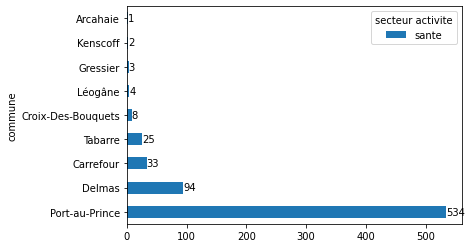

In [714]:
table_bar(secteur='sante')

### Business Of The Construction Sector By Municipality

secteur activite,construction
commune,
Port-au-Prince,133
Delmas,72
Tabarre,46
Carrefour,18
Croix-Des-Bouquets,13
Léogâne,5
Petit-Goâve,5
Cabaret,3
Gressier,3


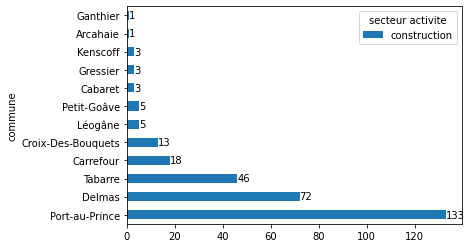

In [715]:
table_bar('construction')

### Automobile Sector Activity By Municipality

secteur activite,service automobile
commune,
Port-au-Prince,175
Delmas,34
Tabarre,21
Carrefour,11
Croix-Des-Bouquets,3
Gressier,1
Léogâne,1


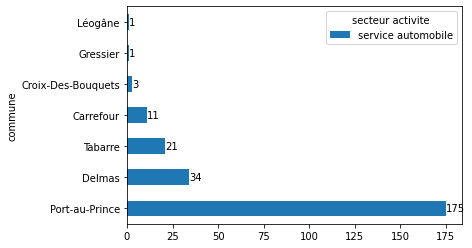

In [716]:
table_bar('service automobile')

### Restaurant Business By Municipality

secteur activite,restauration
commune,
Port-au-Prince,93
Delmas,48
Tabarre,24
Carrefour,20
Kenscoff,16
Croix-Des-Bouquets,5
Léogâne,4
Grand-Goâve,2
Petit-Goâve,2


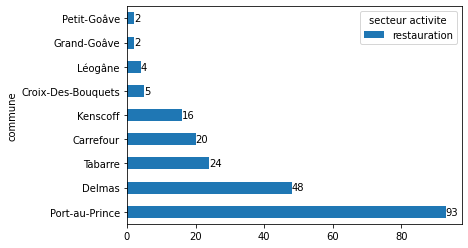

In [717]:
table_bar('restauration')

### Agri-food Sector Activity By Municipality

secteur activite,agroalimentaire
commune,
Port-au-Prince,100
Tabarre,22
Delmas,21
Carrefour,18
Croix-Des-Bouquets,9
Kenscoff,5
Gressier,3
Léogâne,2
Arcahaie,1


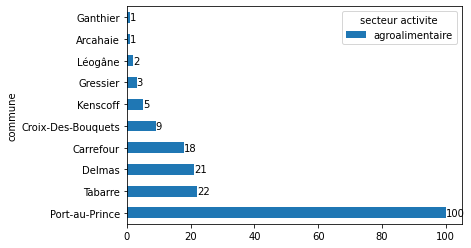

In [718]:
table_bar('agroalimentaire')

### Professional Sector Activity By Municipality

secteur activite,service professionnel
commune,
Port-au-Prince,100
Delmas,30
Carrefour,4
Tabarre,4
Petit-Goâve,3
Croix-Des-Bouquets,2
Léogâne,2
Arcahaie,1
Grand-Goâve,1


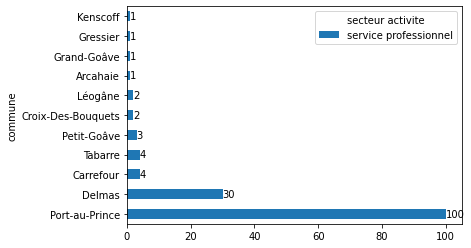

In [719]:
table_bar('service professionnel')

### Financial Sector Business By Municipality

secteur activite,service financier
commune,
Port-au-Prince,67
Delmas,33
Carrefour,18
Tabarre,8
Croix-Des-Bouquets,6
Léogâne,4
Petit-Goâve,4
Cabaret,2
Gressier,2


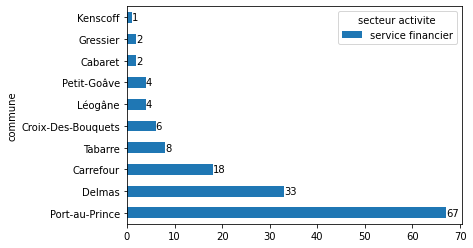

In [720]:
table_bar('service financier')

### IT Business By Municipality

secteur activite,informatique
commune,
Port-au-Prince,74
Delmas,41
Tabarre,12
Léogâne,3
Carrefour,2
Croix-Des-Bouquets,2


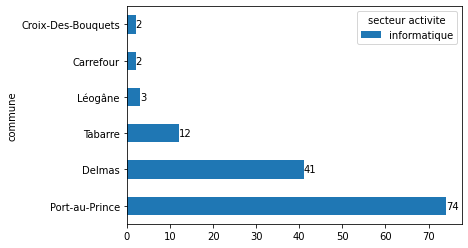

In [721]:
table_bar('informatique')

### Education Sector Activity By Municipality

secteur activite,education
commune,
Port-au-Prince,82
Delmas,33
Carrefour,9
Tabarre,3
Kenscoff,2
Cabaret,1
Léogâne,1


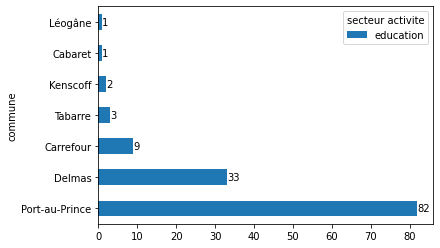

In [722]:
table_bar('education')

### Fashion Sector Activity By Municipality

secteur activite,fashion
commune,
Port-au-Prince,64
Delmas,41
Tabarre,10
Carrefour,5
Kenscoff,3
Gressier,1


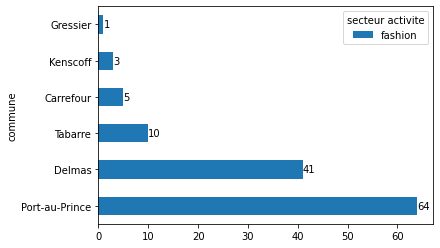

In [723]:
table_bar('fashion')

### Transportation Sector Activity by Municipality

secteur activite,transport
commune,
Port-au-Prince,90
Delmas,17
Tabarre,12
Carrefour,2


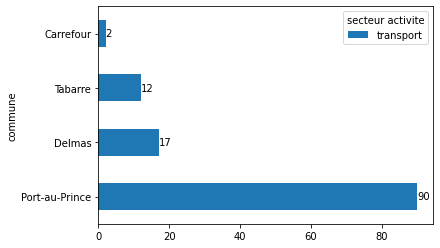

In [724]:
table_bar('transport')

In [748]:
display(final_population.head(2))
display(commune_geolocalisation.head(2))
display(dataset.head(2))

,adm2code,adm2_fr,Population,Femmes,Hommes,Enfants,Adultes,Filles,Garcons,Femmes adultes,Hommes adultes
0,HT0111,Port-au-Prince,1031710,544921,486789,417341,614369,220396,196945,324525,289844
1,HT0112,Delmas,413035,217283,195752,174211,238824,91646,82565,125637,113187


,adm2code,adm1code,adm2_en,longitude,latitude
0,HT0111,HT01,Port-au-Prince,-72.348395,18.565504
1,HT0812,HT08,Abricots,-74.258228,18.650564


,index,adm2code,commune,secteur activite,category
0,0,HT0111,Port-au-Prince,sante,ASSOCIATIONS PROFESSIONNELLES
1,1,HT0111,Port-au-Prince,service professionnel,AVOCATS ET CONSEILLERS JURIDIQUES


In [756]:
poptest= pd.get_dummies(data=final_population, columns=['Femmes','Hommes','Enfants','Adultes','Filles','Garcons'])
#poptest= pd.get_dummies(final_population[['Femmes','Hommes','Enfants','Adultes','Filles','Garcons']])
poptest.head()

,adm2code,adm2_fr,Population,Femmes adultes,Hommes adultes,Femmes_2841,Femmes_3810,Femmes_4140,Femmes_5546,Femmes_5934,Femmes_7014,Femmes_7436,Femmes_7442,Femmes_8907,Femmes_8925,Femmes_9159,Femmes_9428,Femmes_9640,Femmes_9671,Femmes_9878,Femmes_10226,Femmes_10638,Femmes_10891,Femmes_11044,Femmes_11197,Femmes_11447,Femmes_11477,Femmes_11648,Femmes_11874,Femmes_12005,Femmes_12064,Femmes_12209,Femmes_12228,Femmes_12298,Femmes_13006,Femmes_13461,Femmes_13860,Femmes_14031,Femmes_14051,Femmes_14072,Femmes_14104,Femmes_14108,Femmes_14211,Femmes_14754,Femmes_15493,Femmes_15585,Femmes_15718,Femmes_15810,Femmes_15866,Femmes_16001,Femmes_16191,Femmes_16280,Femmes_16606,Femmes_16906,Femmes_17026,Femmes_17113,Femmes_17434,Femmes_17529,Femmes_17729,Femmes_18001,Femmes_18100,Femmes_18112,Femmes_18203,Femmes_18245,Femmes_18311,Femmes_18547,Femmes_18598,Femmes_18945,Femmes_19248,Femmes_19558,Femmes_19570,Femmes_19617,Femmes_19690,Femmes_20088,Femmes_20469,Femmes_21673,Femmes_21776,Femmes_21825,Femmes_21989,Femmes_22308,Femmes_22525,Femmes_22605,Femmes_23745,Femmes_23810,Femmes_24076,Femmes_24175,Femmes_25740,Femmes_25927,Femmes_26027,Femmes_26438,Femmes_27056,Femmes_27805,Femmes_28078,Femmes_28369,Femmes_28615,Femmes_28955,Femmes_28995,Femmes_29907,Femmes_29928,Femmes_30269,Femmes_30837,Femmes_32260,Femmes_32521,Femmes_32590,Femmes_32724,Femmes_33186,Femmes_33329,Femmes_35100,Femmes_35902,Femmes_36695,Femmes_37771,Femmes_40358,Femmes_40918,Femmes_43993,Femmes_44441,Femmes_44770,Femmes_50465,Femmes_53389,Femmes_56217,Femmes_62373,Femmes_62619,Femmes_68028,Femmes_68626,Femmes_71897,Femmes_75268,Femmes_75922,Femmes_76655,Femmes_79524,Femmes_80692,Femmes_80942,Femmes_88575,Femmes_89351,Femmes_94387,Femmes_98979,Femmes_105127,Femmes_110103,Femmes_133020,Femmes_141265,Femmes_143672,Femmes_153510,Femmes_193570,Femmes_202894,Femmes_217283,Femmes_280296,Femmes_544921,Hommes_3235,Hommes_4251,Hommes_4857,Hommes_5469,Hommes_6141,Hommes_7213,Hommes_7865,Hommes_8650,Hommes_8919,Hommes_9186,Hommes_10062,Hommes_10133,Hommes_10375,Hommes_10530,Hommes_10775,Hommes_10795,Hommes_11026,Hommes_11423,Hommes_11622,Hommes_12236,Hommes_12292,Hommes_12721,Hommes_12804,Hommes_12878,Hommes_13228,Hommes_13323,Hommes_13362,Hommes_14146,Hommes_14187,Hommes_14508,Hommes_14557,Hommes_14651,Hommes_14843,Hommes_15241,Hommes_15447,Hommes_15465,Hommes_15733,Hommes_15766,Hommes_15917,Hommes_15971,Hommes_16421,Hommes_16482,Hommes_16657,Hommes_16781,Hommes_16825,Hommes_17065,Hommes_17128,Hommes_17134,Hommes_17482,Hommes_17779,Hommes_18148,Hommes_18250,Hommes_18272,Hommes_18431,Hommes_18749,Hommes_19143,Hommes_19147,Hommes_19229,Hommes_19337,Hommes_19445,Hommes_19834,Hommes_19965,Hommes_20038,Hommes_20209,Hommes_20489,Hommes_20528,Hommes_20823,Hommes_20919,Hommes_21120,Hommes_21208,Hommes_21397,Hommes_22451,Hommes_22685,Hommes_22742,Hommes_23409,Hommes_23445,Hommes_24127,Hommes_24761,Hommes_24891,Hommes_25104,Hommes_26195,Hommes_26533,Hommes_26801,Hommes_27067,Hommes_27086,Hommes_27866,Hommes_28286,Hommes_28368,Hommes_29256,Hommes_29467,Hommes_30080,Hommes_30089,Hommes_30470,Hommes_31685,Hommes_32075,Hommes_32783,Hommes_32826,Hommes_33080,Hommes_33113,Hommes_33343,Hommes_33826,Hommes_34515,Hommes_34831,Hommes_35412,Hommes_36017,Hommes_37141,Hommes_39007,Hommes_41733,Hommes_44368,Hommes_46216,Hommes_46514,Hommes_51686,Hommes_54684,Hommes_55514,Hommes_58964,Hommes_63929,Hommes_64245,Hommes_67373,Hommes_68139,Hommes_71731,Hommes_75402,Hommes_77756,Hommes_77825,Hommes_78436,Hommes_81751,Hommes_89842,Hommes_91393,Hommes_95696,Hommes_96695,Hommes_103044,Hommes_103672,Hommes_127834,Hommes_133235,Hommes_134961,Hommes_135728,Hommes_178778,Hommes_190885,Hommes_195752,Hommes_254045,Hommes_486789,Enfants_2798,Enfants_3264,Enfants_3712,Enfants_4872,Enfants_5770,Enfants_6430,Enfants_6861,Enfants_7103,Enfants_7257,Enfants_7757,Enfants_7868,Enfants_7997,Enfants_8299,Enfants_8359,Enfants_8509,Enfants_9012,Enfants_9434,Enfants_9872,Enfants_10067,Enfants_10120,Enfants_10155,Enfants_10241,Enfants_10346,

In [744]:
dummiestest= pd.get_dummies(dataset['secteur activite'])
dummiestest['businessID'] = dataset['index']
dummiestest['adm2code']= dataset['adm2code']
fcol = dummiestest.pop('adm2code')
scol=dummiestest.pop('businessID')
dummiestest.insert(0, 'adm2code', fcol)
dummiestest.insert(1, 'businessID', scol)
dummiestest.head()

,adm2code,businessID,agroalimentaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service professionnel,sport,transport
0,HT0111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,HT0111,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,HT0111,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HT0111,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,HT0111,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [745]:
f_merge= pd.merge(left=dummiestest,right=final_population,on='adm2code')
f_merge.head()

,adm2code,businessID,agroalimentaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service professionnel,sport,transport,adm2_fr,Population,Femmes,Hommes,Enfants,Adultes,Filles,Garcons,Femmes adultes,income
0,HT0111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Port-au-Prince,1031710,544921,486789,417341,614369,220396,196945,324525,2.593773e+07
1,HT0111,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Port-au-Prince,1031710,544921,486789,417341,614369,220396,196945,324525,2.593773e+07
2,HT0111,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Port-au-Prince,1031710,544921,486789,417341,614369,220396,196945,324525,2.593773e+07
3,HT0111,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Port-au-Prince,1031710,544921,486789,417341,614369,220396,196945,324525,2.593773e+07
4,HT0111,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Port-au-Prince,1031710,544921,486789,417341,614369,220396,196945,324525,2.593773e+07


In [571]:
group=dummiestest.groupby(by='commune').mean()
group

,agroalimentaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,...,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service professionnel,sport,transport
commune,,,,,,,,,,,,,,,,,,,,,
Arcahaie,0.166667,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000
Cabaret,0.000000,0.000000,0.000000,0.428571,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.285714,0.000000,0.000000,0.000000
Carrefour,0.092308,0.030769,0.020513,0.092308,0.000000,0.025641,0.046154,0.030769,0.025641,0.015385,...,0.005128,0.102564,0.169231,0.056410,0.010256,0.010256,0.092308,0.020513,0.005128,0.010256
Croix-Des-Bouquets,0.147541,0.000000,0.000000,0.213115,0.000000,0.016393,0.000000,0.032787,0.000000,0.049180,...,0.000000,0.081967,0.131148,0.049180,0.016393,0.000000,0.098361,0.032787,0.016393,0.000000
Delmas,0.034146,0.016260,0.016260,0.117073,0.000000,0.032520,0.053659,0.026016,0.066667,0.008130,...,0.004878,0.078049,0.152846,0.055285,0.006504,0.021138,0.053659,0.048780,0.006504,0.027642
Ganthier,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Grand-Goâve,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.400000,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000
Gressier,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,...,0.000000,0.000000,0.200000,0.066667,0.000000,0.000000,0.133333,0.066667,0.000000,0.000000
Kenscoff,0.119048,0.071429,0.023810,0.071429,0.000000,0.023810,0.047619,0.000000,0.071429,0.000000,...,0.000000,0.380952,0.047619,0.000000,0.000000,0.000000,0.023810,0.023810,0.000000,0.000000


In [577]:
test= pd.get_dummies(dataset['secteur activite'])
test.sha

(3166, 27)

In [582]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [583]:
model = KMeans(n_clusters=3).fit(test)

In [591]:
test['labels'] = model.labels_

In [592]:
test

,agroalimentaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,...,restauration,sante,service automobile,service courrier,service de securite,service financier,service professionnel,sport,transport,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3163,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3164,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [559]:
dataset.groupby(by='commune').count()

,index,adm2code,secteur activite,category
commune,,,,
Arcahaie,6,6,6,6
Cabaret,7,7,7,7
Carrefour,195,195,195,195
Croix-Des-Bouquets,61,61,61,61
Delmas,615,615,615,615
Ganthier,2,2,2,2
Grand-Goâve,5,5,5,5
Gressier,15,15,15,15
Kenscoff,42,42,42,42


In [555]:
f_merge= pd.merge(left=final_population, right= commune_geolocalisation, on='adm2code')

In [556]:
f_merge.head()

,adm2code,adm2_fr,Population,Femmes,Hommes,Enfants,Adultes,Filles,Garcons,Femmes adultes,income,adm1code,adm2_en,longitude,latitude
0,HT0111,Port-au-Prince,1031710,544921,486789,417341,614369,220396,196945,324525,2.593773e+07,HT01,Port-au-Prince,-72.348395,18.565504
1,HT0112,Delmas,413035,217283,195752,174211,238824,91646,82565,125637,1.038392e+07,HT01,Delmas,-72.290461,18.570885
2,HT0113,Carrefour,534341,280296,254045,235636,298705,123841,111795,156455,1.343361e+07,HT01,Carrefour,-72.415623,18.554113
3,HT0114,Pétion-Ville,393779,202894,190885,163369,230410,83521,79848,119373,9.899812e+06,HT01,Petion-Ville,-72.257083,18.549457
4,HT0115,Kenscoff,60017,29928,30089,27366,32651,13623,13743,16305,1.508859e+06,HT01,Kenscoff,-72.29185,18.476804


In [ ]:
kenscoff['income']=np.random.choice([250000, 750000, 255000,150000,85000,
                                     115000,200000,115000,500000,350000,
                                     256000,95000,180000,325000,275000,
                                     165000,450000,600000,475000,225000,
                                     365000], kenscoff.shape[0])

In [ ]:
kenscoff.loc[:,['name','income']]

In [ ]:
start = pd.to_datetime('1993-01-01') 
end = pd.to_datetime('2015-01-01') 
kenscoff['founded']=random_dates(start, end, n=kenscoff.shape[0])